In [ ]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Sai Teja\Desktop\GPS Trajectory\go_track_tracks.csv") 
df.head()

,id,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus,linha
0,1,0,19.210586,0.138049,2.652,3,0,0,1,NaN
1,2,0,30.848229,0.171485,5.290,3,0,0,1,NaN
2,3,1,13.560101,0.067699,0.918,3,0,0,2,NaN
3,4,1,19.766679,0.389544,7.700,3,0,0,2,NaN
4,8,0,25.807401,0.154801,3.995,2,0,0,1,NaN


In [ ]:
df.describe()

,id,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,15607.650307,7.386503,16.704738,0.264272,5.302411,2.515337,0.386503,0.515337,1.466258
std,18644.257138,7.348742,16.016168,0.292731,7.639011,0.679105,0.687859,0.841485,0.500397
min,1.000000,0.000000,0.009779,0.002175,0.001000,1.000000,0.000000,0.000000,1.000000
25%,48.500000,1.000000,1.591016,0.035978,0.034500,2.000000,0.000000,0.000000,1.000000
50%,158.000000,4.000000,16.685368,0.214466,3.995000,3.000000,0.000000,0.000000,1.000000
75%,37991.000000,10.000000,23.915760,0.390572,7.333000,3.000000,1.000000,1.000000,2.000000
max,38092.000000,27.000000,96.206029,1.942948,55.770000,3.000000,3.000000,2.000000,2.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_drop=df.drop(['id','id_android','linha'],axis=1)

In [ ]:
df_dummies=pd.get_dummies(df_drop,columns=['rating_weather','car_or_bus'])
df_dummies.head()


,speed,time,distance,rating,rating_bus,rating_weather_0,rating_weather_1,rating_weather_2,car_or_bus_1,car_or_bus_2
0,19.210586,0.138049,2.652,3,0,1,0,0,1,0
1,30.848229,0.171485,5.290,3,0,1,0,0,1,0
2,13.560101,0.067699,0.918,3,0,1,0,0,0,1
3,19.766679,0.389544,7.700,3,0,1,0,0,0,1
4,25.807401,0.154801,3.995,2,0,1,0,0,1,0


In [ ]:
print(df_dummies.shape)
df_dup=df_dummies.drop_duplicates()


(163, 10)


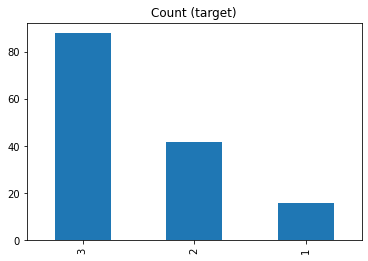

In [ ]:
target_count = df_dup['rating'].value_counts()

target_count.plot(kind='bar', title='Count (target)');

(264, 10)


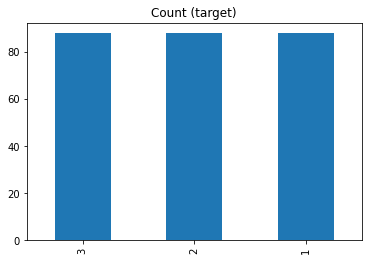

In [ ]:
from imblearn.over_sampling import RandomOverSampler 
ros = RandomOverSampler(random_state=42)
#print(df_dup.columns)
X_res, y_res = ros.fit_resample(df_dup.drop(['rating'],axis=1), df_dup['rating'])
#print(X_res.shape)
#print(y_res)
#print(df_dup)
features_sampling=pd.DataFrame(data=X_res,columns=['speed', 'time', 'distance', 'rating_bus', 'rating_weather_0',
       'rating_weather_1', 'rating_weather_2', 'car_or_bus_1', 'car_or_bus_2'])
target_sampling=pd.DataFrame(data=y_res,columns=['rating'])
#print(features_sampling['rating_bus'])
#print(target_sampling)
target_count = target_sampling['rating'].value_counts()

target_count.plot(kind='bar', title='Count (target)');
df_dup=pd.concat([features_sampling,target_sampling],axis=1)
print(df_dup.shape)

from sklearn.preprocessing import MinMaxScaler
#print(df_dup.columns)
fe_sc=df_dup[['speed','time','distance']]
print(fe_sc)
fe_nsc=pd.DataFrame(data=df_dup.drop(['speed','time','distance'],axis=1),columns=['rating_bus', 'rating_weather_0',
       'rating_weather_1', 'rating_weather_2', 'car_or_bus_1', 'car_or_bus_2',
       'rating'])
print(fe_nsc.shape)
scaler = MinMaxScaler(copy='true')
scaler.fit(fe_sc)
fe_scd=pd.DataFrame(data=scaler.transform(fe_sc),columns=fe_sc.columns)
data=pd.concat([fe_scd,fe_nsc],axis=1)
print(data[['rating_bus','time']])
correlation=data.corr(method ='pearson')
#print(correlation)
#print(fe_scd.columns)
#print(df_scaled.corr())
#print(fe_scd.shape)

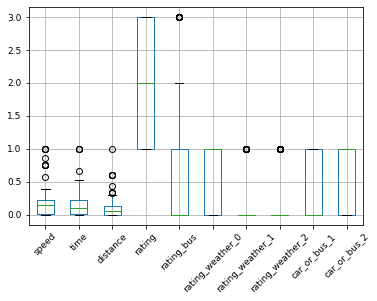

In [ ]:
boxplot=data.boxplot(column=['speed', 'time', 'distance', 'rating', 'rating_bus',
       'rating_weather_0', 'rating_weather_1', 'rating_weather_2',
       'car_or_bus_1', 'car_or_bus_2'],rot=45,fontsize=9)

AxesSubplot(0.125,0.125;0.775x0.755)


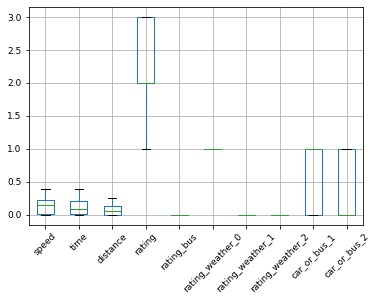

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
# #print(IQR)
# #print(df< (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))

df_dup = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
#print(df_dup.shape)
#print()
# #df_removedoutliers.shape
# #dfo_scaled = pd.DataFrame(scaler.fit_transform(df_removedoutliers), columns=df_removedoutliers.columns)
# #df= pd.DataFrame(sc.fit_transform(sdf))
boxplot=df_dup.boxplot(column=['speed','time','distance','rating','rating_bus','rating_weather_0','rating_weather_1','rating_weather_2','car_or_bus_1','car_or_bus_2'],rot=45,fontsize=9)
print(boxplot)
# features_transformed=pd.DataFrame(data=df_dup.drop(['rating','rating_bus','rating_weather_0','rating_weather_1','rating_weather_2','car_or_bus_1','car_or_bus_2'
# ],axis=1))
# features_nontransformed=pd.DataFrame(data=df_dup[['rating','rating_bus','rating_weather_0','rating_weather_1','rating_weather_2','car_or_bus_1','car_or_bus_2'
# ]],columns=['rating','rating_bus','rating_weather_0','rating_weather_1','rating_weather_2','car_or_bus_1','car_or_bus_2'
# ])
# df_transformed=pd.DataFrame(data=pt.fit(df_dup).transform(df_dup),columns=df_dup.columns)

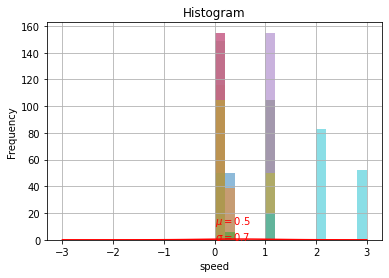

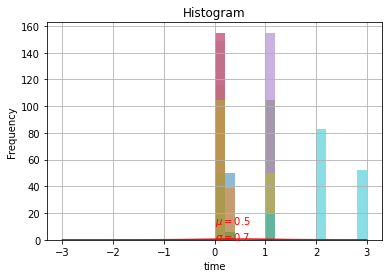

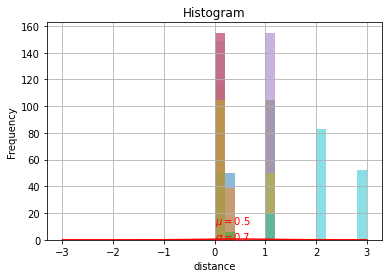

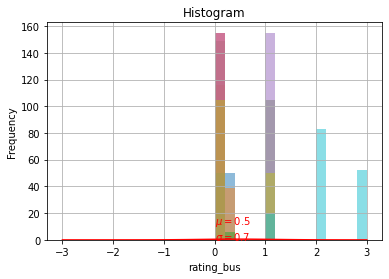

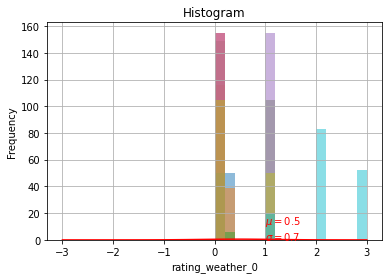

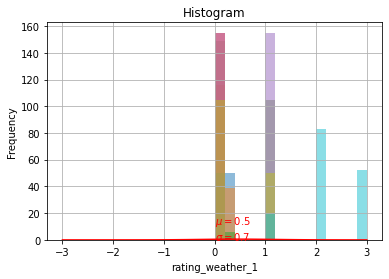

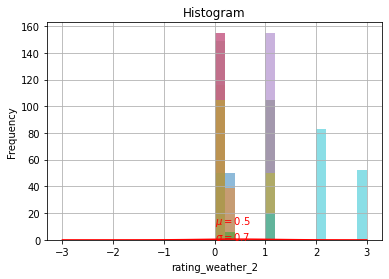

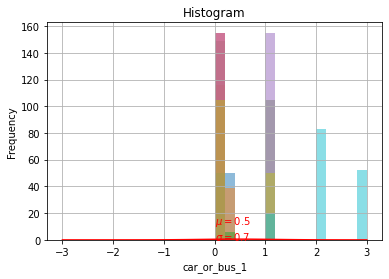

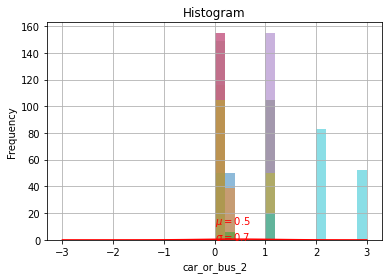

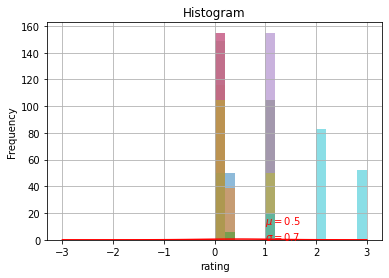

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
j=0
for i in df_dup.keys():
    param = stats.norm.fit(df_dup)
    x = np.linspace(-3, 3, 100)
    pdf_fitted = stats.norm.pdf(x, *param)
    df_dup.plot.hist(alpha=0.5, bins=15, grid=True, legend=None)
    plt.text(x=np.min(df_dup[i]), y=0.1, s=r"$\mu=%0.1f$" % param[0] + "\n" + r"$\sigma=%0.1f$" % param[1], color='r')
    plt.xlabel(i)
    plt.title("Histogram")
    plt.plot(x, pdf_fitted, color='r')
    
    j=j+1
plt.show()

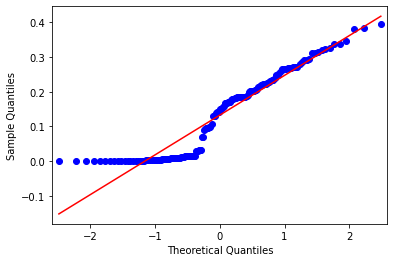

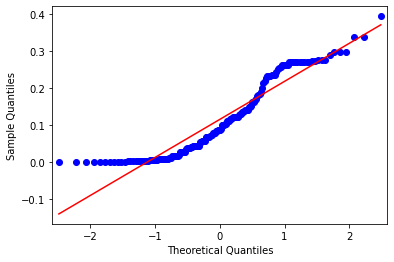

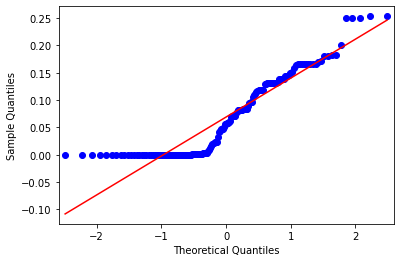

In [ ]:
import matplotlib.pyplot as plt
x=pd.DataFrame(data=df_dup[['speed','time','distance']],columns=['speed','time','distance'])
target=pd.DataFrame(data=df_dup['rating'],columns=['rating'])
from statsmodels.graphics.gofplots import qqplot
for each in x.keys():
    qqplot(x[each],line='s')
    plt.show()

In [ ]:
print(df_dup)

        speed      time  distance  rating_bus  rating_weather_0  \
0    0.199600  0.070010  0.047535           0                 1   
1    0.320579  0.087238  0.094838           0                 1   
2    0.140861  0.033762  0.016443           0                 1   
3    0.205381  0.199595  0.138052           0                 1   
4    0.268177  0.078642  0.071617           0                 1   
..        ...       ...       ...         ...               ...   
259  0.168964  0.231234  0.131489           0                 1   
260  0.130995  0.297263  0.130933           0                 1   
261  0.003094  0.235179  0.002510           0                 1   
262  0.268177  0.078642  0.071617           0                 1   
263  0.201815  0.120773  0.082376           0                 1   

     rating_weather_1  rating_weather_2  car_or_bus_1  car_or_bus_2  rating  
0                   0                 0             1             0       3  
1                   0                 0

In [ ]:
features=df_dup.drop(['rating'],axis=1)
target=pd.DataFrame(data=df_dup['rating'],columns=['rating'])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2)

In [ ]:
from mord import LogisticAT
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
model_ordinal = LogisticAT()
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
import numpy as np

print(features.columns)
model_ordinal.fit(x_train,y_train['rating'])
predictions=model_ordinal.predict(x_test)
print(predictions)

from sklearn.metrics import accuracy_score
score=accuracy_score(predictions,y_test)
print(score)
print(model_ordinal.coef_)
con_mat=confusion_matrix(predictions,y_test)
print(con_mat)
# folds = 5

# MAE = make_scorer(mean_absolute_error)
# #print(MAE)
# MAE_ordinal = cross_validate(model_ordinal,
#      features,
#      target,
#      cv=folds,
#      return_estimator=True)
# #print('Ordered logistic regression: ', MAE_ordinal)
# for model in MAE_ordinal['estimator']:
#      print(model.coef_)
# #     #print(model.intercept_)
# # #print(model_ordinal.intercept_)
# #from sklearn.model_selection import train_test_split
# #x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2)
# # #print(x_train)


Index(['speed', 'time', 'distance', 'rating_bus', 'rating_weather_0',
       'rating_weather_1', 'rating_weather_2', 'car_or_bus_1', 'car_or_bus_2'],
      dtype='object')
[3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
0.5806451612903226
[ 2.02567317e+00 -1.24549837e+00 -1.77166187e-01  0.00000000e+00
  3.99414867e-06  0.00000000e+00  0.00000000e+00  6.00029160e-01
 -6.00025166e-01]
[[ 0  0  0]
 [ 3 17 10]
 [ 0  0  1]]


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
array = df_dup.values

#Split the data into input and target

X = array[:,0:8]

Y = array[:,8]

#Feature extraction

model = LogisticRegression(solver="lbfgs") 
rfe = RFE(model)

fit = rfe.fit(X, Y)

print("Num Features: %d"% fit.n_features_) 
print("Selected Features: %s"% fit.support_)
print("Feature Ranking: %s"% fit.ranking_)

Num Features: 4
Selected Features: [ True  True  True False False False False  True]
Feature Ranking: [1 1 1 5 2 4 3 1]


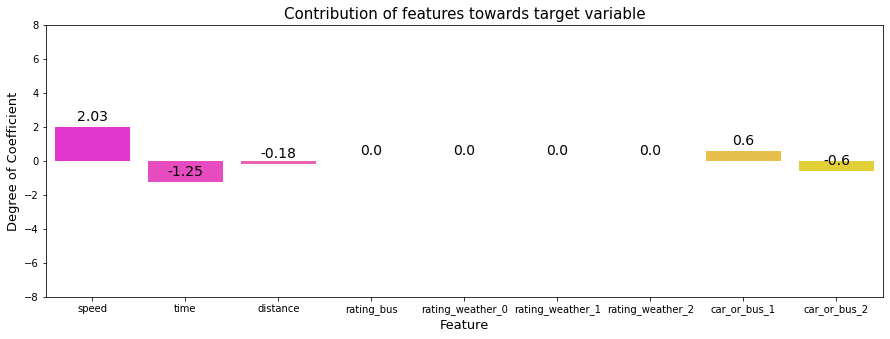

In [ ]:
#print(df_dup.columns)
columns_names=['speed', 'time', 'distance', 'rating_bus', 'rating_weather_0',
       'rating_weather_1', 'rating_weather_2', 'car_or_bus_1', 'car_or_bus_2',
       ]
regression_coefficient = pd.DataFrame({'Feature': columns_names, 'Coefficient': model_ordinal.coef_}, columns=['Feature', 'Coefficient'])

plt.figure(figsize=(15,5))
import seaborn as sns

g = sns.barplot(x='Feature', y='Coefficient', data=regression_coefficient, capsize=0.3, palette='spring')
g.set_title("Contribution of features towards target variable", fontsize=15)
g.set_xlabel("Feature", fontsize=13)
g.set_ylabel("Degree of Coefficient", fontsize=13)
g.set_yticks([-8, -6, -4, -2, 0, 2, 4, 6, 8])
g.set_xticklabels(columns_names)
for p in g.patches:
    g.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
               textcoords='offset points', fontsize=14, color='black')

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
ar=df_dup.values
X = ar[:,0:8]

Y = ar[:,8]

#Feature extraction

model = LogisticRegression(solver="lbfgs")
rfe = RFE(model)

fit = rfe.fit(X, Y)

print("Num Features: %d"% fit.n_features_)
print("Selected Features: %s"% fit.support_)
print("Feature Ranking: %s"% fit.ranking_)

Num Features: 4
Selected Features: [ True  True  True False False False False  True]
Feature Ranking: [1 1 1 5 2 4 3 1]


In [ ]:
from scipy.stats import chisquare
chisquare(predictions,y_test)

Power_divergenceResult(statistic=array([20.5       ,  6.66666667,  6.66666667,  6.66666667,  6.66666667,
        6.66666667,  6.66666667,  6.66666667,  6.66666667,  6.66666667,
        6.66666667,  6.66666667,  6.66666667,  6.66666667,  6.66666667,
        6.66666667,  6.66666667,  6.66666667,  6.66666667,  6.66666667,
        6.66666667,  6.66666667,  6.66666667,  6.66666667,  6.66666667,
        6.66666667,  6.66666667,  6.66666667,  6.66666667,  6.66666667,
        6.66666667]), pvalue=array([0.90286922, 0.99999761, 0.99999761, 0.99999761, 0.99999761,
       0.99999761, 0.99999761, 0.99999761, 0.99999761, 0.99999761,
       0.99999761, 0.99999761, 0.99999761, 0.99999761, 0.99999761,
       0.99999761, 0.99999761, 0.99999761, 0.99999761, 0.99999761,
       0.99999761, 0.99999761, 0.99999761, 0.99999761, 0.99999761,
       0.99999761, 0.99999761, 0.99999761, 0.99999761, 0.99999761,
       0.99999761]))

<AxesSubplot:>

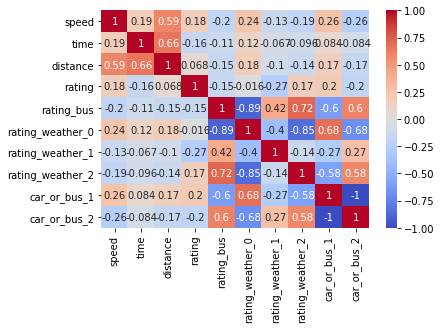

In [ ]:
import seaborn as sns
correlation=df_dummies.corr(method ='pearson')
#print(correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [ ]:
x_train_drop=x_train.drop(['car_or_bus_1','rating_bus','rating_weather_1','rating_weather_2'],axis=1)
x_test_drop=x_test.drop(['car_or_bus_1','rating_bus','rating_weather_1','rating_weather_2'],axis=1)
from mord import LogisticAT
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
model_ordinal = LogisticAT()
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
import numpy as np
model_ordinal.fit(x_train_drop,y_train['rating'])
predictions=model_ordinal.predict(x_test_drop)
print(predictions)

from sklearn.metrics import accuracy_score
score=accuracy_score(predictions,y_test)
print(score)
print(model_ordinal.coef_)
from sklearn.metrics import confusion_matrix
con_mat=confusion_matrix(predictions,y_test)
print(con_mat)

[3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
0.5806451612903226
[ 2.06133899e+00 -1.21864298e+00 -1.57543593e-01  1.51312682e-06
 -1.12726270e+00]
[[ 0  0  0]
 [ 3 17 10]
 [ 0  0  1]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features_sampling,target_sampling,test_size=0.2)

In [ ]:
from mord import LogisticAT
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
a_model_ordinal = LogisticAT()
a_model_ordinal.fit(x_train,y_train['rating'])
predictions=a_model_ordinal.predict(x_test)
print(predictions)

from sklearn.metrics import accuracy_score
score=accuracy_score(predictions,y_test)
print(score)
print(model_ordinal.coef_)

[2 3 2 3 2 1 2 1 2 2 2 2 3 1 1 2 2 2 2 3 1 1 3 2 1 1 3 2 2 1 2 2 2 3 2 3 2
 2 2 2 2 2 2 2 2 1 1 3 1 2]
0.44
[ 2.06133899e+00 -1.21864298e+00 -1.57543593e-01  1.51312682e-06
 -1.12726270e+00]


In [ ]:
import seaborn as sns

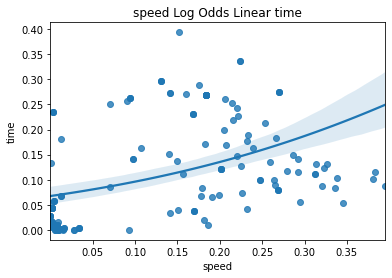

In [ ]:
gre = sns.regplot(x= 'speed', y= 'time', data= df_dup, logistic= True).set_title("speed Log Odds Linear time")
gre.figure.savefig("gre log lin.png")

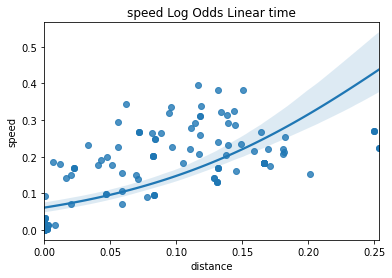

In [ ]:
gre = sns.regplot(x='distance', y= 'speed', data= df_dup, logistic= True).set_title("speed Log Odds Linear time")
gre.figure.savefig("gre log lin.png")

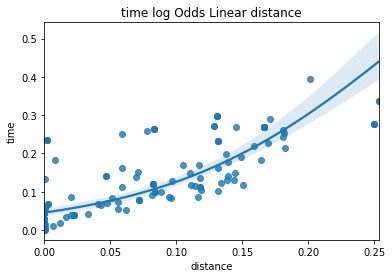

In [ ]:
gre = sns.regplot(x= 'distance', y= 'time', data= df_dup, logistic= True).set_title("time log Odds Linear distance")
gre.figure.savefig("time log distance.png")

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
X=df_dup.drop(['rating'],axis=1)
Y=df_dup['rating']

# for i in range(0,len(Y)):
#     if Y[i]==1 or Y[i]==2:
#         Y[i]=1
#     else:
#         Y[i]=0
clogreg = LogisticRegressionCV(solver="lbfgs",cv=5,multi_class="auto",max_iter=1500).fit(X,Y)
print(clogreg.score(X,Y))
print(clogreg.coef_)
print(clogreg.intercept_)

0.6580645161290323
[[-5.52937645e+00  3.49973228e+00  3.17699747e+00  0.00000000e+00
   7.34732679e-04  0.00000000e+00  0.00000000e+00 -5.08808722e-01
   5.09543454e-01]
 [-2.09417689e+00  9.46012334e-02 -1.04109826e+00  0.00000000e+00
  -4.76831727e-03  0.00000000e+00  0.00000000e+00 -2.31973236e-02
   1.84290064e-02]
 [ 7.62355334e+00 -3.59433352e+00 -2.13589920e+00  0.00000000e+00
   4.03358459e-03  0.00000000e+00  0.00000000e+00  5.32006045e-01
  -5.27972461e-01]]
[-0.59933298  1.14190937 -0.54257638]


In [ ]:
X_t=df_dup.drop(['car_or_bus_1','rating','rating_bus','rating_weather_1','rating_weather_2'],axis=1)
Y_t=df_dup['rating']
clogreg = LogisticRegressionCV(solver="lbfgs",cv=5,multi_class="auto",max_iter=1500).fit(X_t,Y_t)
print(clogreg.score(X_t,Y_t))
print(clogreg.coef_)
print(clogreg.intercept_)

0.6580645161290323
[[-5.53012522e+00  3.49323352e+00  3.17501131e+00  4.43626905e-03
   1.01243181e+00]
 [-2.09529415e+00  9.64946614e-02 -1.04183170e+00 -1.63980216e-04
   4.16808761e-02]
 [ 7.62541937e+00 -3.58972818e+00 -2.13317961e+00 -4.27228883e-03
  -1.05411268e+00]]
[-1.10810845  1.11328506 -0.00517661]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2)
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(x_train, y_train['rating'])  
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
predictions=pd.DataFrame(data=clf.predict(x_test),columns=['predictions'])
x_test=np.array(x_test)
#print(predictions)
#print(y_test)
print(clf.feature_importances_)
print(clf.score(x_test,y_test))
print(features.columns)

[0.36938958 0.27644795 0.22101614 0.         0.         0.
 0.         0.08028932 0.05285701]
0.7096774193548387
Index(['speed', 'time', 'distance', 'rating_bus', 'rating_weather_0',
       'rating_weather_1', 'rating_weather_2', 'car_or_bus_1', 'car_or_bus_2'],
      dtype='object')


In [ ]:
f_imp=features.drop(['rating_bus','rating_weather_0','rating_weather_1','rating_weather_2'],axis=1)
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
x_train,x_test,y_train,y_test=train_test_split(f_imp,target,test_size=0.2)
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(x_train, y_train['rating'])  
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
predictions=pd.DataFrame(data=clf.predict(x_test),columns=['predictions'])
x_test=np.array(x_test)
#print(predictions)
#print(y_test)
print(clf.feature_importances_)
print(clf.score(x_test,y_test))

[0.42823024 0.27402775 0.19983939 0.04579569 0.05210692]
0.5483870967741935


In [ ]:
rfc = RandomForestClassifier()
y=y_train['rating']
rfc.fit(x_train,y)# predictions
rfc_predict = rfc.predict(x_test)
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rfc_random.fit(x_train, y_train)
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.2min finished
/home/sree/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 1000, 'max_features': 'auto', 'max_depth': 140}


In [ ]:
rfc = RandomForestClassifier(n_estimators=1000, max_features='sqrt',max_depth=100)
rfc.fit(x_train,y_train)
rfc_predict = rfc.predict(x_test)
y=y_test['rating']
print("=== Confusion Matrix ===")
print(confusion_matrix(y, rfc_predict))
j=0
count=0
for i in y:
    if i==rfc_predict[j]:
        #print(i)
        count=count+1
    j=j+1
#print(count)
accuracy=count/len(y)
print(accuracy)   
#print('\n')

<ipython-input-46-ede46f8cfa01>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


=== Confusion Matrix ===
[[ 9  0  0]
 [ 0 14  2]
 [ 0  1  5]]
0.9032258064516129
